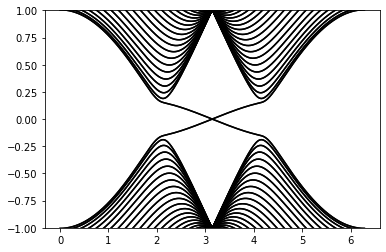

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp()
import functools  # 使用偏函数functools.partial()


def hamiltonian(k, N, M, t1, t2, phi):  # Kane-Mele model
    # 初始化为零矩阵
    h00 = np.zeros((2*4*N, 2*4*N))*(1+0j)   # 乘(1+0j)是为了把h0转为复数
    h01 = np.zeros((2*4*N, 2*4*N))*(1+0j)

    for spin in range(2):
        # 原胞内的跃迁h00
        for i in range(N):
            # 最近邻
            h00[i*4*2+0*2+spin, i*4*2+1*2+spin] = t1 
            h00[i*4*2+1*2+spin, i*4*2+0*2+spin] = t1

            h00[i*4*2+1*2+spin, i*4*2+2*2+spin] = t1  
            h00[i*4*2+2*2+spin, i*4*2+1*2+spin] = t1

            h00[i*4*2+2*2+spin, i*4*2+3*2+spin] = t1  
            h00[i*4*2+3*2+spin, i*4*2+2*2+spin] = t1

            # 次近邻
            h00[i*4*2+0*2+spin, i*4*2+2*2+spin] = t2*cmath.exp(-1j*phi)*sign_spin(spin)    
            h00[i*4*2+2*2+spin, i*4*2+0*2+spin] = h00[i*4*2+0*2+spin, i*4*2+2*2+spin].conj()
            h00[i*4*2+1*2+spin, i*4*2+3*2+spin] = t2*cmath.exp(-1j*phi)*sign_spin(spin) 
            h00[i*4*2+3*2+spin, i*4*2+1*2+spin] = h00[i*4*2+1*2+spin, i*4*2+3*2+spin].conj()
            
        for i in range(N-1):
            # 最近邻
            h00[i*4*2+3*2+spin, (i+1)*4*2+0*2+spin] = t1  
            h00[(i+1)*4*2+0*2+spin, i*4*2+3*2+spin] = t1

            # 次近邻
            h00[i*4*2+2*2+spin, (i+1)*4*2+0*2+spin] = t2*cmath.exp(1j*phi)*sign_spin(spin) 
            h00[(i+1)*4*2+0*2+spin, i*4*2+2*2+spin] = h00[i*4*2+2*2+spin, (i+1)*4*2+0*2+spin].conj()
            h00[i*4*2+3*2+spin, (i+1)*4*2+1*2+spin] = t2*cmath.exp(1j*phi)*sign_spin(spin) 
            h00[(i+1)*4*2+1*2+spin, i*4*2+3*2+spin] = h00[i*4*2+3*2+spin, (i+1)*4*2+1*2+spin].conj()

        # 原胞间的跃迁h01
        for i in range(N):
            # 最近邻
            h01[i*4*2+1*2+spin, i*4*2+0*2+spin] = t1  
            h01[i*4*2+2*2+spin, i*4*2+3*2+spin] = t1

            # 次近邻
            h01[i*4*2+0*2+spin, i*4*2+0*2+spin] = t2*cmath.exp(1j*phi)*sign_spin(spin)  
            h01[i*4*2+1*2+spin, i*4*2+1*2+spin] = t2*cmath.exp(-1j*phi)*sign_spin(spin) 
            h01[i*4*2+2*2+spin, i*4*2+2*2+spin] = t2*cmath.exp(1j*phi)*sign_spin(spin) 
            h01[i*4*2+3*2+spin, i*4*2+3*2+spin] = t2*cmath.exp(-1j*phi)*sign_spin(spin) 

            h01[i*4*2+1*2+spin, i*4*2+3*2+spin] = t2*cmath.exp(1j*phi)*sign_spin(spin)  
            h01[i*4*2+2*2+spin, i*4*2+0*2+spin] = t2*cmath.exp(-1j*phi)*sign_spin(spin) 

            if i != 0:
                h01[i*4*2+1*2+spin, (i-1)*4*2+3*2+spin] = t2*cmath.exp(1j*phi)*sign_spin(spin)   
                
        for i in range(N-1):
            h01[i*4*2+2*2+spin, (i+1)*4*2+0*2+spin] = t2*cmath.exp(-1j*phi)*sign_spin(spin) 

    matrix = h00 + h01*cmath.exp(1j*k) + h01.transpose().conj()*cmath.exp(-1j*k)
    return matrix


def sign_spin(spin):
    if spin==0:
        sign=1
    else:
        sign=-1
    return sign


def main():
    hamiltonian0 = functools.partial(hamiltonian, N=20, M=0, t1=1, t2=0.03, phi=pi/2)  # 使用偏函数，固定一些参数
    k = np.linspace(0, 2*pi, 300)
    plot_bands_one_dimension(k, hamiltonian0)


def plot_bands_one_dimension(k, hamiltonian, filename='bands_1D'):
    dim = hamiltonian(0).shape[0]
    dim_k = k.shape[0]
    eigenvalue_k = np.zeros((dim_k, dim))  # np.zeros()里要用tuple
    i0 = 0
    for k0 in k:
        matrix0 = hamiltonian(k0)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)
        eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:]))
        i0 += 1
    for dim0 in range(dim):
        plt.plot(k, eigenvalue_k[:, dim0], '-k')  # -.
    plt.ylim(-1, 1)
    # plt.savefig(filename + '.jpg')
    # plt.savefig(filename+'.eps')
    plt.show()


if __name__ == '__main__':  # 如果是当前文件直接运行，执行main()函数中的内容；如果是import当前文件，则不执行。
    main()